In [1]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,roc_auc_score

In [16]:
model_name, unct_type = 'gpt', 2
with open('./res/{}_{}.json'.format(model_name, unct_type),'r') as f:
    res = json.load(f)

In [17]:
with open('./data/agument.json','r') as f:
    env = json.load(f)

In [18]:
TASK_NAMES = ["cooking", "cleaning", "massaging"]

In [19]:
uncts = {0:{0:[],1:[],2:[]},1:{0:[],1:[],2:[]},2:{0:[],1:[],2:[]}}
total = {0:[],1:[],2:[]}

for key, data in res.items():
    # if int(key) > 5129:
    #     continue
    # if int(key) < 950:
    #     continue
    # print(key)
    ori = env[key]
    label = ori['label']
    task = ori['task']
    if label ==3:
        continue
    # print(key)
    unct = data['unct']
    temp = []
    for u in unct:
        temp.append(u['total'])
    try:
        temp = sum(temp)/len(temp)
        # temp = max(temp)
    except:
        continue
    if str(temp) == 'nan':
        # print("NaN")
        continue
    
    total[label].append(temp)
    # print(TASK_NAMES.index(task), label)
    uncts[TASK_NAMES.index(task)][label].append(temp)

In [20]:
def plot_roc_curve(uncts,model_name, unct_type=None, task_name=None):
    plt.title("model name: {}, unct type: {}, task: {}".format(model_name,unct_type, task_name))
    certain = uncts[0]
    ambiguous = uncts[1]
    ood = uncts[2]

    new_unct = certain + ambiguous
    new_label = [0 for _ in range(len(certain))] + [1 for _ in range(len(ambiguous))]
    
    precision, recall, thresholds = precision_recall_curve(new_label, new_unct)
    roc_score_ambiguous = roc_auc_score(new_label, new_unct)
    plt.plot(recall, precision, label="AMB auc={}".format(roc_score_ambiguous))

    new_unct = certain + ood
    new_label = [0 for _ in range(len(certain))] + [1 for _ in range(len(ood))]
    
    precision, recall, thresholds = precision_recall_curve(new_label, new_unct)
    roc_score_ood = roc_auc_score(new_label, new_unct)
    plt.plot(recall, precision, label="OOD auc={}".format(roc_score_ood))

    new_unct = certain + ambiguous + ood
    new_label = [0 for _ in range(len(certain))] +[1 for _ in range(len(ambiguous))] + [1 for _ in range(len(ood))]
    
    precision, recall, thresholds = precision_recall_curve(new_label, new_unct)
    roc_score_total = roc_auc_score(new_label, new_unct)
    plt.plot(recall, precision, label="TOTAL auc={}".format(roc_score_total))


    name = '{}_{}'.format(model_name, unct_type) if unct_type != None else model_name
    plt.legend()
    plt.savefig("./res/roc_{}_{}.png".format(name, task_name))
    plt.show()
    return roc_score_ambiguous, roc_score_ood, roc_score_total

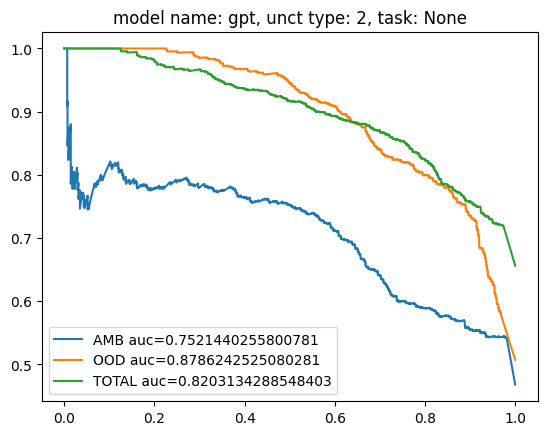

(0.7521440255800781, 0.8786242525080281, 0.8203134288548403)

In [21]:
plot_roc_curve(total, model_name, unct_type)

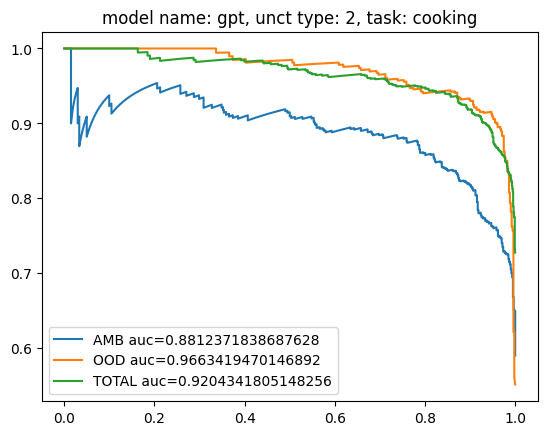

In [22]:
cooks = plot_roc_curve(uncts[0], model_name, unct_type, TASK_NAMES[0])

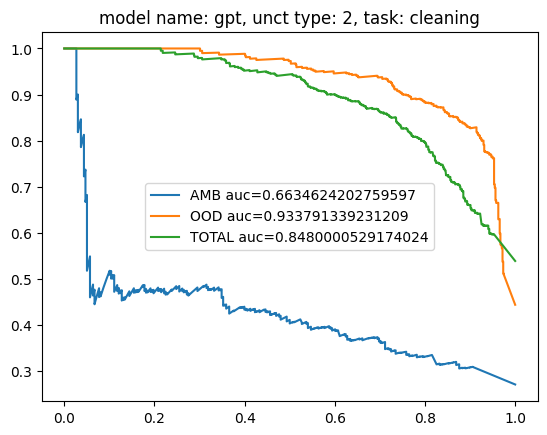

In [23]:
cleans = plot_roc_curve(uncts[1], model_name, unct_type, TASK_NAMES[1])

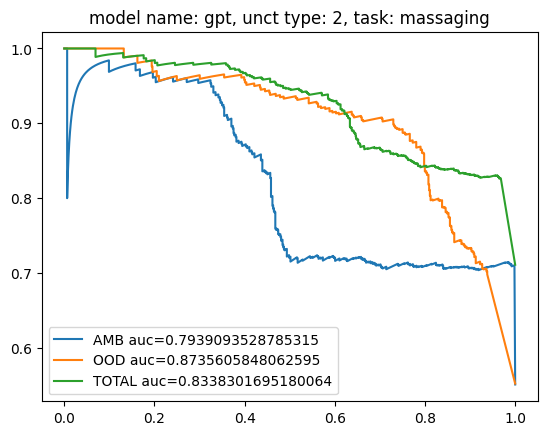

In [24]:
massag = plot_roc_curve(uncts[2], model_name, unct_type, TASK_NAMES[2])

In [25]:
for amb_c, amb_cl, amb_m in zip(cooks, cleans, massag):
    print((amb_c+ amb_cl+ amb_m)/3)

0.7795363190077514
0.9245646236840527
0.8674214676500781


In [12]:
import numpy as np

1.0828236589725653 317 423


Text(0.5, 0, 'x')

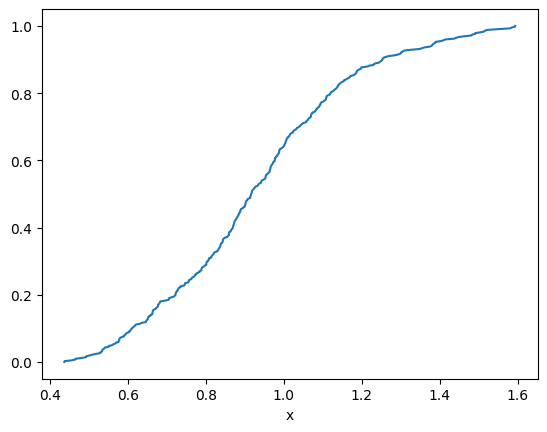

In [13]:
# Get threshold
c = uncts[0][0]
data = np.asarray(c)
x = np.sort(data)

#calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)

y_index = np.where(y>0.75)[0][0]
print(x[y_index], y_index, len(data))
#plot CDF
plt.plot(x, y)
plt.xlabel('x')

0.9420909219475538 614 768


Text(0.5, 0, 'x')

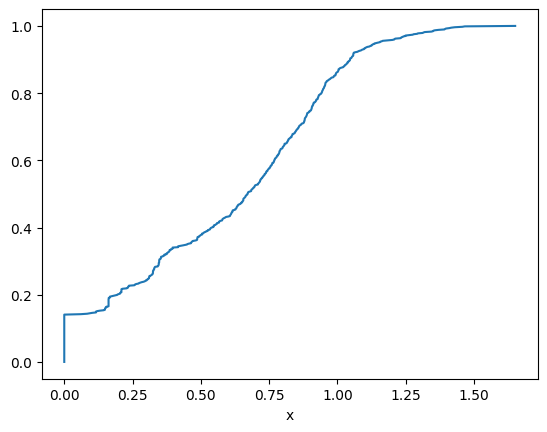

In [14]:
# Get threshold
c = uncts[1][0]
data = np.asarray(c)
x = np.sort(data)

#calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)

y_index = np.where(y>0.8)[0][0]
print(x[y_index], y_index, len(data))
#plot CDF
plt.plot(x, y)
plt.xlabel('x')

0.09302361365251269 408 510


Text(0.5, 0, 'x')

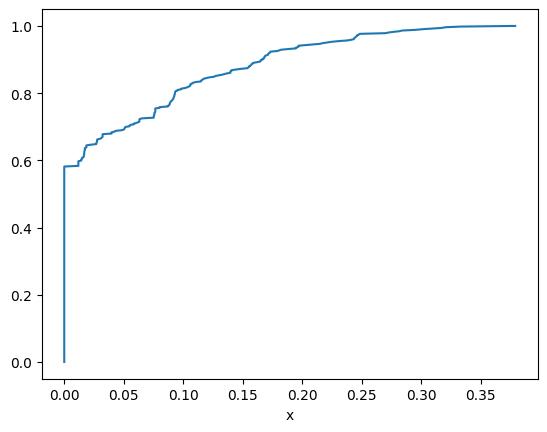

In [15]:
# Get threshold
c = uncts[2][0]
data = np.asarray(c)
x = np.sort(data)

#calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)

y_index = np.where(y>0.8)[0][0]
print(x[y_index], y_index, len(data))
#plot CDF
plt.plot(x, y)
plt.xlabel('x')